<a href="https://colab.research.google.com/github/MBronars/SohnResearch2022_Bronars/blob/main/CellSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install pyyaml==5.1

import torch
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
# Install detectron2 that matches the above pytorch version
# See https://detectron2.readthedocs.io/tutorials/install.html for instructions
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/$CUDA_VERSION/torch$TORCH_VERSION/index.html
# If there is not yet a detectron2 release that matches the given torch + CUDA version, you need to install a different pytorch.

# exit(0)  # After installation, you may need to "restart runtime" in Colab. This line can also restart runtime

     |████████████████████████████████| 274 kB 5.3 MB/s 
  Created wheel for pyyaml: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44092 sha256=c9da42d2a935b5ce5c0902423c71ff9aab0329f8561d4fa72046a7d49c901972
  Stored in directory: /root/.cache/pip/wheels/77/f5/10/d00a2bd30928b972790053b5de0c703ca87324f3fead0f2fd9
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13
torch:  1.10 ; cuda:  cu111
Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu111/torch1.10/index.html
     |████████████████████████████████| 7.0 MB 941 kB/s 
     |████████████████████████████████| 74 kB 1.8 MB/s 
     |████████████████████████████████| 50 kB 5.9 MB/s 
     |████████████████████████████████| 145 kB 11.4 MB/s 
     |████████████████████████████████| 130 kB 43.3 MB/s 
     |████████████████████████████████| 843 kB 40.6 MB/s 
     |███████████████████████████████

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd '/content/drive/My Drive/Github/'

[Errno 2] No such file or directory: '/content/drive/My Drive/Github/'
/content


In [ ]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

In [ ]:
import os
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np
import os
import numpy as np
!pip install pycocotools
!pip install structures

In [ ]:
from pycocotools import mask as cocoMask
import structures as struc
def my_dataset_function(path):
    pathMask = "/content/masks/"
    path2 = "/content/rawImgs/"
    temp = os.listdir(path)
    annotations = []
    for f in temp:
        if ".jpg" != f[-4:]:
            continue
        #print(f)
        dic = {"file_name":path + f}
        dic["height"] = 308
        dic["width"] = 308
        #print(pathMask + f[:-4] + ".png")
        img = cv.imread(pathMask + f[:-4] + ".png")
        img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        #print(dic["file_name"])
        dic["annotations"] = []
        for c in range(1, 256):
            anndic = {}
            anndic["category_id"] = 1
            anndic["bbox_mode"] = detectron2.structures.BoxMode.XYXY_ABS
            mask = (img == [c])
            if mask.any():
                #print("pixels of color: " + str(c))
                mask1 = mask.astype(np.uint8)
                ann = cocoMask.encode(np.asarray(mask1, order="F"))
                a = np.where(mask != 0)
                bbox = np.min(a[1]), np.min(a[0]), np.max(a[1]), np.max(a[0])
                anndic["bbox"] = bbox
                anndic["segmentation"] = ann
                dic["annotations"].append(anndic)
        annotations.append(dic)
    return annotations

# New Section

In [ ]:
files = my_dataset_function("/content/test/")
print(files)

[{'file_name': '/content/test/w2_R22C22_Grey_4Day_63.jpg', 'height': 308, 'width': 308, 'annotations': [{'category_id': 1, 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'bbox': (187, 55, 254, 175), 'segmentation': {'size': [308, 308], 'counts': b'_Zh14`91O0000000O1000000O0010O0001O00010O0O20O1OYGLn75SHLa72mG2c0L^7?_HE`7;aHE^7<bHE\\7=cHC]7>^HJ^77_HM_73aHM_73aH^OH8e7:nHFP7:QIIl66UIKi65WILi63WIOh60XI1g6OYI3f6LZI5e6K[I7d6H\\I:b6F^I=_6CaIc0Z6\\OfIg0W6YOiIQ1n5nNRJU1k5kNTJ;@8k5^OdJ8E8h5_ObJ8K6c5BaJ723^5E]JNEEf0?^5NTJ0f70VH2l7OQHKKHU8=nGJ0HS8>lGG5Ko7<mGH6Lm78QHJ4Nk75THL2Oj75fHLZ74fHLZ74fHL_7O`H1[80hF2X950O2MUk?'}}]}, {'file_name': '/content/test/w2_R22C26_Grey_4Day_37.jpg', 'height': 308, 'width': 308, 'annotations': [{'category_id': 1, 'bbox_mode': <BoxMode.XYXY_ABS: 0>, 'bbox': (210, 61, 251, 97), 'segmentation': {'size': [308, 308], 'counts': b'RXo13a90O2O000O1000ON103M3O1N1O1O1O2O0O1000001O1O1O0O10KUGAk8=6N3K4M2011N3N2NKjFNT92nF0o80RG1l8OVG0i80YGOg81ZGNf81[GNf80ci`0'}}, {'category_id': 1, 'bbox_mode

In [ ]:
def cell_train():
  return my_dataset_function("/content/train/")

In [ ]:
from detectron2.data import DatasetCatalog
#DatasetCatalog.register("my_dataset", my_dataset_function)
DatasetCatalog.register("cell_train", cell_train)

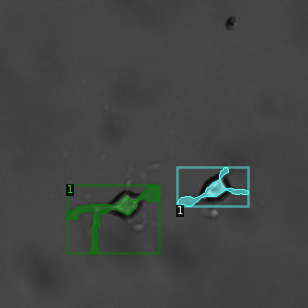

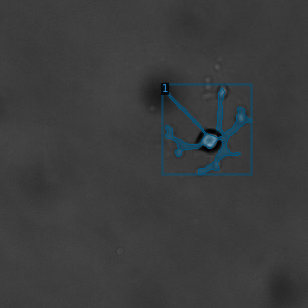

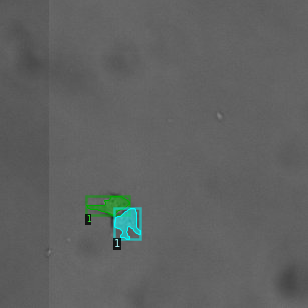

In [ ]:
dataset_dicts = my_dataset_function("/content/train/")
for d in random.sample(dataset_dicts, 3):
    img = cv2.imread(d["file_name"])
    visualizer = Visualizer(img[:, :, ::-1])
    out = visualizer.draw_dataset_dict(d)
    cv2_imshow(out.get_image()[:, :, ::-1])

In [ ]:
from detectron2.engine import DefaultTrainer

cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("cell_train",)
cfg.DATASETS.TEST = ()
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")  # Let training initialize from model zoo
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025  # pick a good LR
cfg.SOLVER.MAX_ITER = 300    # 300 iterations seems good enough for this toy dataset; you will need to train longer for a practical dataset
cfg.SOLVER.STEPS = []        # do not decay learning rate
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128   # faster, and good enough for this toy dataset (default: 512)
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 1  # only has one class (ballon). (see https://detectron2.readthedocs.io/tutorials/datasets.html#update-the-config-for-new-datasets)
# NOTE: this config means the number of classes, but a few popular unofficial tutorials incorrect uses num_classes+1 here.

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg) 
trainer.resume_or_load(resume=False)
trainer.train()

[04/07 22:13:34 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:02, 60.3MB/s]                           
Skip loading parameter 'roi_heads.box_predictor.cls_score.weight' to the model due to incompatible shapes: (81, 1024) in the checkpoint but (2, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.cls_score.bias' to the model due to incompatible shapes: (81,) in the checkpoint but (2,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.weight' to the model due to incompatible shapes: (320, 1024) in the checkpoint but (4, 1024) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.box_predictor.bbox_pred.bias' to the model due to incompatible shapes: (320,) in the checkpoint but (4,) in the model! You might want to double check if this is expected.
Skip loading parameter 'roi_heads.mask_head.predictor.weight' to the model due to i

[04/07 22:13:44 d2.engine.train_loop]: Starting training from iteration 0
ERROR [04/07 22:13:44 d2.engine.train_loop]: Exception during training:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/detectron2/engine/train_loop.py", line 149, in train
    self.run_step()
  File "/usr/local/lib/python3.7/dist-packages/detectron2/engine/defaults.py", line 494, in run_step
    self._trainer.run_step()
  File "/usr/local/lib/python3.7/dist-packages/detectron2/engine/train_loop.py", line 267, in run_step
    data = next(self._data_loader_iter)
  File "/usr/local/lib/python3.7/dist-packages/detectron2/data/common.py", line 234, in __iter__
    for d in self.dataset:
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 521, in __next__
    data = self._next_data()
  File "/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py", line 1203, in _next_data
    return self._process_data(data)
  File "/usr/local/lib/python3

ValueError: ignored